# Daily Financial News for 6000+ Stocks
### Some Data Understanding an Preparation for Prediction of stockpricse by the Sentiment of Headlines
@author DHR <br>
@author BKN <br>
used Data in this Notebook: 'https://www.kaggle.com/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests'

## Requirements

In [29]:
#immport basic DataScience Modules
#!! for pip-modul-list to install @see requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [30]:
#import basic topic modelling
import re
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import gensim

import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [31]:
#import basic visualization
from wordcloud import WordCloud, STOPWORDS
import nltk #tokenization
#nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to C:\Users\Dominik
[nltk_data]     Höhr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#import basic api requirements
from polygon import RESTClient
import datetime
import time

def unique(l):
    ## list of only the unique values from a given list
    x = np.array(l)
    return np.unique(x)

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#Load Data
data = pd.read_csv('../data/raw_analyst_ratings.csv')
#colums: id,headline,url,publisher,date,stock

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Understanding

No Data Cleaning

In [34]:
#first Look
print(data.columns)
data.head()

Index(['id', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [35]:
#statistics
print("observations: {}, features: {} \n".format(data.shape[0], data.shape[1]))
print("unique headlines: {}, unique stocks: {} \n".format(len(data.headline.unique()), len(data.stock.unique())))

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


observations: 1407328, features: 6 

unique headlines: 845770, unique stocks: 6204 



In [36]:
stock = data.groupby("stock")
stock.head()

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407261,1413782,China Zenix Auto International Announces Inten...,https://www.benzinga.com/news/18/06/11886479/c...,Benzinga Newsdesk,2018-06-15 09:01:12-04:00,ZX
1407262,1413783,China Zenix Auto Shares Halted News Pending,https://www.benzinga.com/news/18/06/11876679/c...,Benzinga Newsdesk,2018-06-13 16:52:35-04:00,ZX
1407263,1413784,"China Zenix Auto Q1 EPS $0.08, Made $130.123M ...",https://www.benzinga.com/news/earnings/18/05/1...,Benzinga Newsdesk,2018-05-17 06:01:41-04:00,ZX
1407264,1413785,"China Zenix Auto Reports Q4 EPS $0.03, Sales $...",https://www.benzinga.com/news/earnings/18/03/1...,Eddie Staley,2018-03-15 06:01:22-04:00,ZX


### Data Visualization

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Number of Headlines')

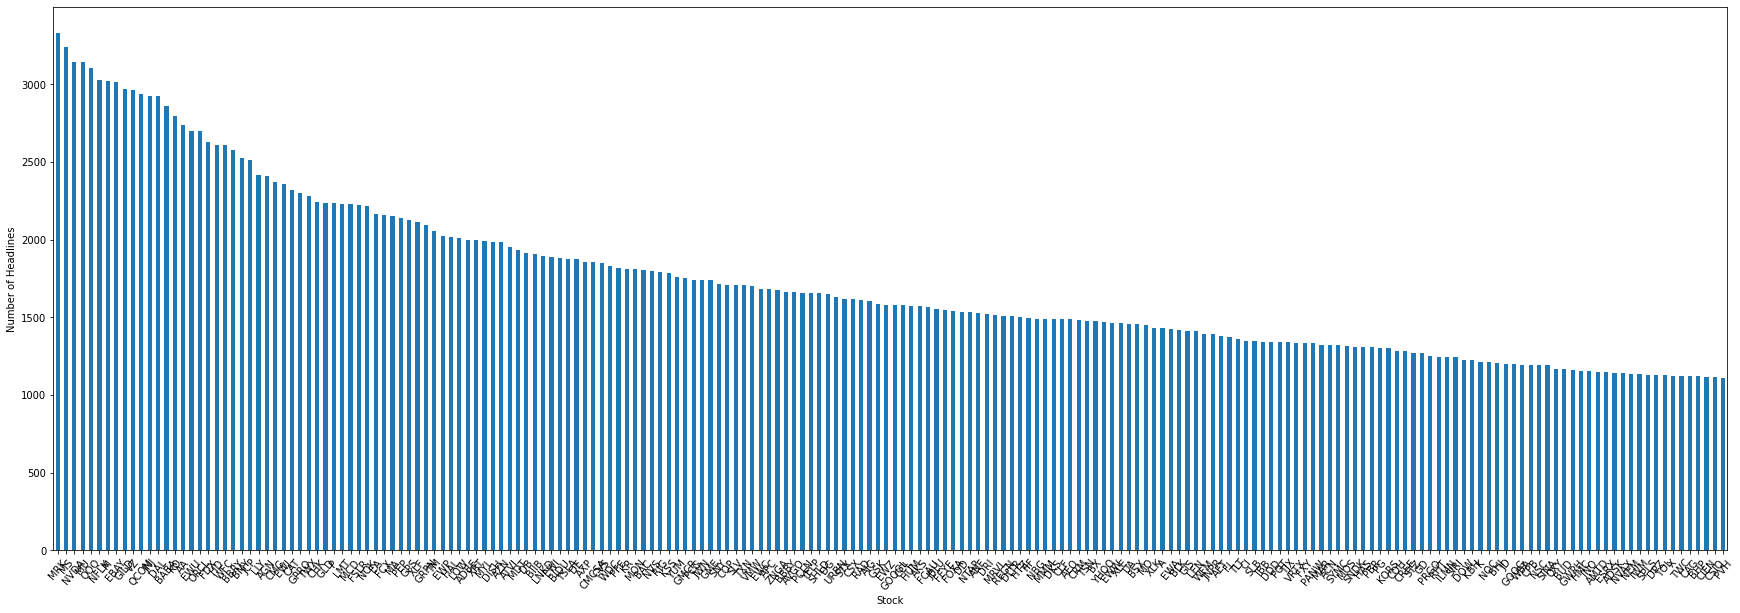

In [37]:
# Number of Headlines by Stock first 200
plt.figure(figsize=(30,10))
stock.size().sort_values(ascending=False)[0:200].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Stock")
plt.ylabel("Number of Headlines")

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Number of Headlines')

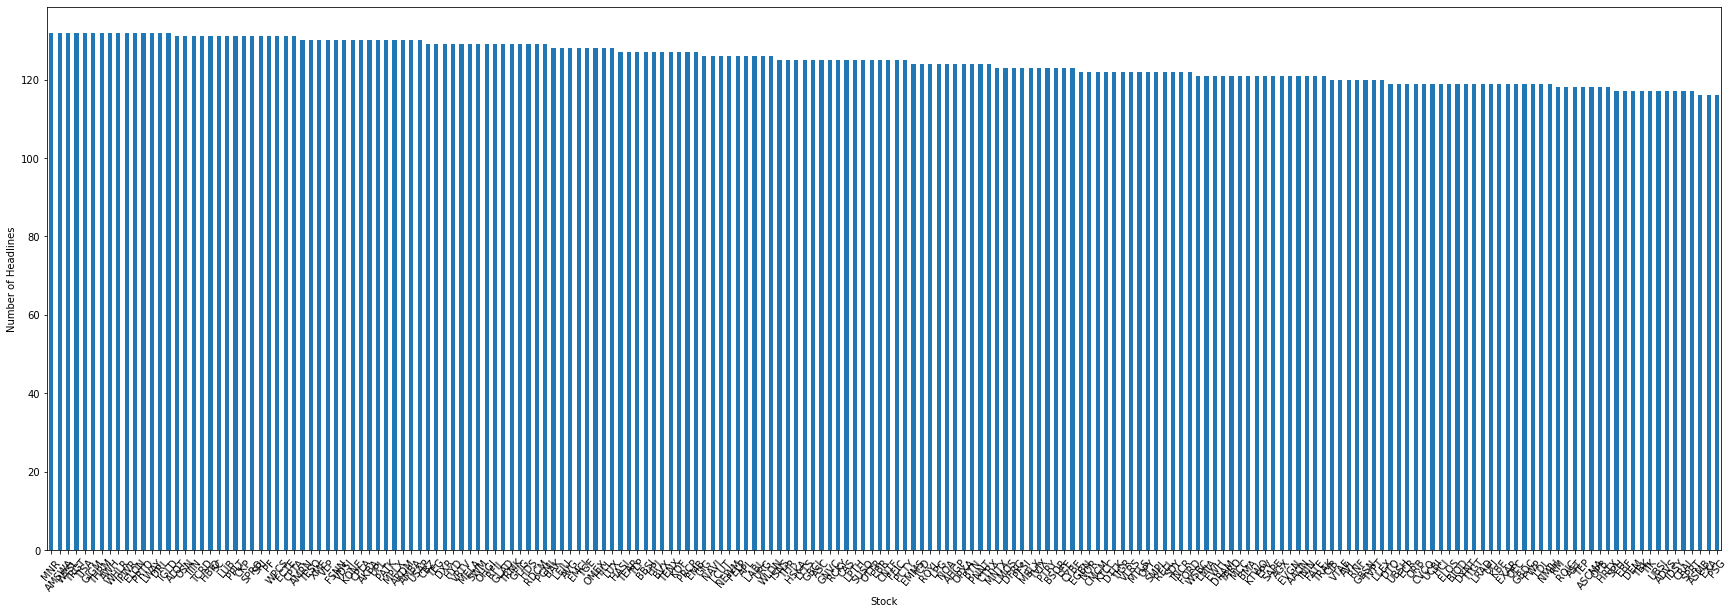

In [38]:
# Number of Headlines by Stock middle 200
plt.figure(figsize=(30,10))
stock.size().sort_values(ascending=False)[2800:3000].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Stock")
plt.ylabel("Number of Headlines")

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Number of Headlines')

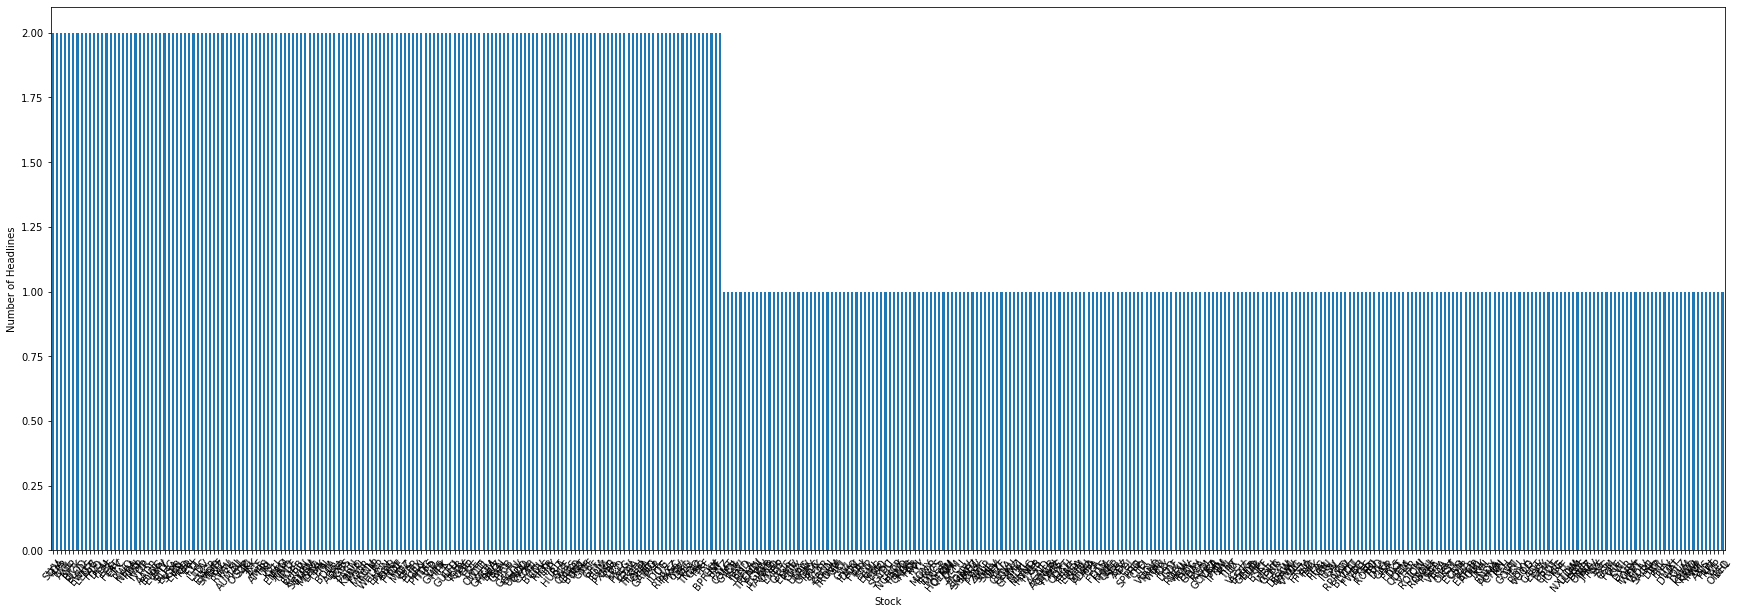

In [39]:
# Number of Headlines by Stock last 400
plt.figure(figsize=(30,10))
stock.size().sort_values(ascending=False)[5800:6205].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Stock")
plt.ylabel("Number of Headlines")

In [ ]:
# Termdocument Matrix

# all headlines as String in List
docs = []
for headline in data.headline:
    docs.append(headline)
docs = docs[0:1000]

vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

# !! TDM just useful for stemmend and removed Stopwords dataset

#### Wordclouds before Data Cleaning

In [ ]:
# Wordcloud for all Headlines

#combine all headlines to one text
text = " ".join(headline for headline in data.headline)

#wordcloud
#!! No Stopword removal
# stopwords = STOPWORDS
# stopwords.update(["Benzinga", "Stocks", "vs", "Est", "EPS"])
wordcloud = WordCloud(max_words=50).generate(text)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#save
wordcloud.to_file("./results/wordcloud.png")

In [ ]:
# Wordcloud for one Stock

#combine all headlines of one Stock
stockFilter = 'A'
text_SpecificStock = " ".join(headline for headline in data[data["stock"]==stockFilter].headline)

#wordcloud
#!! No Stopword removal
wordcloud = WordCloud(max_words=50).generate(text_SpecificStock)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#save
wordcloud.to_file("./results/wordcloud_stock-"+ stockFilter  +".png")

In [ ]:
# Top n-Words
n = 20

wordFreq = WordCloud().process_text(text)
wordFreq = dict(sorted(wordFreq.items(), key=lambda item: item[1], reverse=True)[:n])

plt.bar(range(len(wordFreq)), list(wordFreq.values()), align='center')
plt.xticks(range(len(wordFreq)), list(wordFreq.keys()), rotation=50)
plt.show()

#### Topic Modelling before Data Cleaning

In [ ]:
# Topic Modelling with topicCount Topics
topicCount = 10

## Necessary Text Cleaning
# Remove punctuation
# data['headline_processed'] = \
# data['headline'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
# data['headline_processed'] = \
# data['headline_processed'].map(lambda x: x.lower())

# stop_words = stopwords.words('english')
# stop_words.extend(['bezinga', 'stock'])

## Necessary Tokenzisation of Sentences to Words
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]


headline = data.headline.values.tolist() #use headline_processed instead of headline for a little bit of DataCleaning
headline_words = list(sent_to_words(headline))
# remove stop words
# headline_words = remove_stopwords(headline_words)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(headline_words)
# Create Corpus
texts = headline_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [50]:
# The Real Topic Modelling
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=topicCount)
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.078*"in" + 0.077*"stocks" + 0.053*"the" + 0.048*"market" + '
  '0.044*"session" + 0.042*"moving" + 0.032*"day" + 0.029*"mid" + 0.029*"pre" '
  '+ 0.024*"top"'),
 (1,
  '0.037*"for" + 0.030*"to" + 0.025*"of" + 0.014*"and" + 0.013*"announces" + '
  '0.011*"the" + 0.010*"analyst" + 0.009*"with" + 0.009*"in" + 0.009*"new"'),
 (2,
  '0.043*"from" + 0.035*"to" + 0.031*"yesterday" + 0.030*"new" + '
  '0.027*"movers" + 0.027*"share" + 0.027*"stocks" + 0.024*"week" + '
  '0.022*"which" + 0.021*"biggest"'),
 (3,
  '0.031*"to" + 0.030*"the" + 0.030*"in" + 0.027*"of" + 0.016*"and" + '
  '0.014*"are" + 0.014*"shares" + 0.012*"on" + 0.012*"says" + 0.012*"as"'),
 (4,
  '0.089*"to" + 0.060*"on" + 0.036*"pt" + 0.031*"buy" + 0.027*"raises" + '
  '0.026*"maintains" + 0.024*"target" + 0.023*"price" + 0.021*"at" + '
  '0.019*"downgrades"'),
 (5,
  '0.069*"benzinga" + 0.060*"for" + 0.050*"stocks" + 0.050*"top" + '
  '0.036*"week" + 0.030*"on" + 0.027*"to" + 0.026*"that" + 0.026*"watch" + '
  '0.02

In [52]:
# Visualization of the Topic Modelling

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./app/results_ldavis_prepared_'+str(topicCount))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './app/results_ldavis_prepared_'+ str(topicCount) +'.html')
LDAvis_prepared

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.031033 -0.072165       1        1  21.786918
4      0.012296  0.264536       2        1  13.808673
1      0.043701  0.029873       3        1  12.346221
9      0.097497 -0.071097       4        1  10.831812
6      0.262201 -0.000477       5        1   8.006598
8      0.113699 -0.130873       6        1   7.408391
5     -0.278301  0.057656       7        1   7.044445
0     -0.198757 -0.244441       8        1   6.940583
2     -0.099492  0.135041       9        1   6.246714
7      0.016123  0.031946      10        1   5.579644, topic_info=       Term           Freq          Total Category  logprob  loglift
297      vs  172740.000000  172740.000000  Default  30.0000  30.0000
295     est  149946.000000  149946.000000  Default  29.0000  29.0000
35      eps  135320.000000  135320.000000  Default  28.0000  28.0000
4    stocks  162930.000000  162930.000000  Default  27.0000  27.0000
49      for  251949.000000  251949.000000  Default  26.0000  26.0000
..      ...            ...            ...      ...      ...      ...
43      the   10275.044004  219769.283956  Topic10  -4.3691  -0.1768
299      up    7425.272126   80802.531367  Topic10  -4.6940   0.4989
9      from    7589.229902  125610.693960  Topic10  -4.6721   0.0796
19       of    6146.874874  282958.463300  Topic10  -4.8829  -0.9433
421  august    4642.288246   15752.094329  Topic10  -5.1636   1.6643

[887 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
463        1  0.108401  acquire
463        2  0.089904  acquire
463        3  0.561848  acquire
463        4  0.071716  acquire
463        5  0.000723  acquire
...      ...       ...      ...
11071      1  0.003072   zumiez
11071      3  0.001024   zumiez
11071      6  0.994159   zumiez
11071      7  0.001024   zumiez
7706       4  0.999478    zynga

[4200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 10, 7, 9, 6, 1, 3, 8])

### Data Quality

## Data Preparation

### Clean

### Construct

#### API call to get StockPrices for all stocks that occur more than 10 times
used API : 'https://polygon.io/'
(need timeouts because of max 5 Api calls per Minute)

In [ ]:
# List of Stock Ticker to call
# Stocks that occur more than occ times
occ = 10
stocks = data[data.groupby('stock').stock.transform(len) > occ]
stocks_unique = unique(stocks['stock'])

In [ ]:
# API call with TimeOut (5 per minute)
key = 'grBCBHpUX9BL8Hsy1qWi61pPT60YN3pA'
results = []

for s in stocks_unique:
    #may curse error if intervall to big and API on this price level doesnt like that
    from_ = data['date'].loc[data['stock'] == s].min()
    to = data['date'].loc[data['stock'] == s].max()

    #The API call
    with RESTClient(key) as client:
            resp = client.stocks_equities_aggregates(s, 15, "minute", from_, to, unadjusted=False)
            # save the nessecary attributes of the JSON as List
            for result in resp.results:
                dt = datetime.datetime.fromtimestamp(result['t'] / 1000.0).isoformat()
                results.append([s, dt, result['o'], result['h'], result['l'], result['c']])
    time.sleep(12)

#save the List-Data as DataFrame
stock_prices = pd.DataFrame(results, columns=['stock', 'time', 'o', 'h', 'l', 'c'])
#save the DataFrame as csv
stock_prices.to_csv('../data/raw_stock_prices.csv', encoding='utf-8', index=False)

In [ ]:
#get the API data from the csv to DataFrame
stock_prices = pd.read_csv('../data/raw_stock_prices.csv')

### Format

## Data Understanding: Visualization after Cleaning

#### Wordclouds after Data Cleaning

#### Topic Modelling after Data Cleaning